In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_games = pd.read_csv("boardgame.csv", header=0, index_col=0, delimiter=r",")
df_games.head()

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,,,,,,,,,,,,,,,,,,,
12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
features_names = list(df_games.columns[:])
print(features_names)

['type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [4]:
print(df_games.columns)

Index([u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [5]:
print(df_games.shape)

(81312, 19)


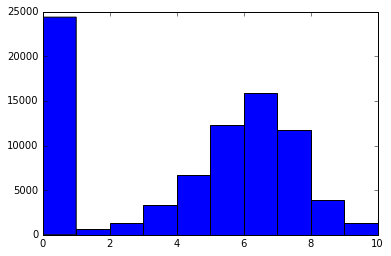

In [6]:
plt.hist(df_games["average_rating"])
plt.show()

In [7]:
df_subset_zero = df_games[df_games["average_rating"] == 0]
print(df_subset_zero.iloc[0])

type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 318, dtype: object


In [8]:
df_subset_nonzero = df_games[df_games["average_rating"] > 0]
print(df_subset_nonzero.iloc[0])

type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 12333, dtype: object


In [9]:
df_subset_rated = df_games[df_games["users_rated"] > 0]
# Remove any rows with missing values.
df_subset_rated = df_subset_rated.dropna(axis=0)

In [10]:
kmeans_model = KMeans(n_clusters=5, random_state=1)
df_numeric_columns = df_subset_rated._get_numeric_data()

kmeans_model.fit(df_numeric_columns)
labels = kmeans_model.labels_

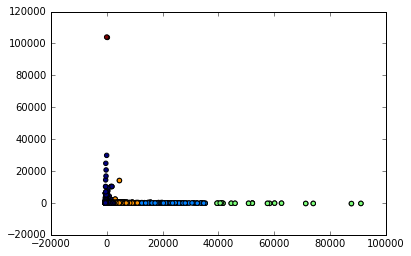

In [11]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_numeric_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [12]:
df_subset_rated.corr()["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [13]:
columns_list = df_subset_rated.columns.tolist()
print (columns_list)

['type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [14]:
columns = [c for c in columns_list if c not in ["bayes_average_rating", "average_rating", "type", "name"]]
target = "average_rating"

In [15]:
train = df_subset_rated.sample(frac=0.8, random_state=1)
test = df_subset_rated.loc[~df_subset_rated.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 19)
(10819, 19)


In [16]:
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
predictions = model.predict(test[columns])
mean_squared_error(predictions, test[target])

2.1706481002761406

In [19]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.5171009885017595